In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
%matplotlib inline

In [2]:
image1 = Image.open("./1.jpg")
image2 = Image.open("./2.jpg")
image3 = Image.open("./3.jpg")
# images at different time stamps are stored sequentially as above 

In [3]:
numpy_array1 = np.array(image1)
numpy_array2 = np.array(image2)
numpy_array3 = np.array(image3)
# images are converted to 2 D array using numpy

In [4]:
numpy_image1 = Image.fromarray(numpy_array1).convert("RGB")
numpy_image2 = Image.fromarray(numpy_array2).convert("RGB")
numpy_image3 = Image.fromarray(numpy_array3).convert("RGB")
# image sin 2 D matrix are converted to RGB format

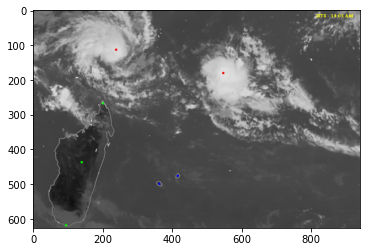

In [5]:
image = image1.copy()
image_numpy = np.array(image)
plt.imshow(image)
# image1 copied and displayed for reference

In [6]:
# function to detect red point of trajectory of Belna in 3 images
def detect_red_left(image1):
    width , height = image1.size
    for x in range(0, width//2):
        for y in range(0, height):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if r > 254 and g < 3 and b < 2: 
                # relative RGB value of red colour point
                return (x,-y)
    

In [7]:
# function to detect red point of trajectory of Ambali in 3 images
def detect_red_right(image1):
    width , height = image1.size
    for x in range(width//2,width):
        for y in range(0, height):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if r > 254 and g < 3 and b < 2:
                # relative RGB value of red colour point
                return (x,-y)

In [8]:
# function to detect green point of location of north point of Madagascar
def detect_green_north(image1):
    width , height = image1.size
    for x in range(0,width):
        for y in range(0, height//2):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if g > 254 and r < 3 and b < 2:
                # relative RGB value of green colour point
                return (x,-y)

In [9]:
# function to detect green point of location of capital of Madagascar
def detect_green_capital(image1):
    width , height = image1.size
    for x in range(0,width):
        for y in range(height//2, (4*height)//5):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if g > 254 and r < 3 and b < 2:
                # relative RGB value of green colour point
                return (x,-y)

In [10]:
# function to detect green point of location of south point of Madagascar
def detect_green_south(image1):
    width , height = image1.size
    for x in range(0,width):
        for y in range((4*height)//5,height):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if g > 254 and r < 3 and b < 2:
                # relative RGB value of green colour point
                return (x,-y)

In [11]:
# function to detect blue point of location of reunion island
def detect_blue_reunion(image1):
    width , height = image1.size
    for x in range(0,(2*width)//5):
        for y in range(height//2,height):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if b > 254 and r < 3 and g < 2:
                # relative RGB value of blue colour point
                return (x,-y)

In [12]:
# function to detect blue point of location of Mauritius
def detect_blue_mauritius(image1):
    width , height = image1.size
    for x in range((2*width)//5,width):
        for y in range(height//2,height):
            r, g, b = image1.getpixel((x,y))
            value = (r,g,b)
            if b > 254 and r < 3 and g < 2:
                # relative RGB value of blue colour point
                return (x,-y)

In [13]:
belna1 = detect_red_left(image1) # SITS - 14:03 AM
belna2 = detect_red_left(image2) # SITS - 14:44 AM 
belna3 = detect_red_left(image3) # SITS - 15:39 AM
# belna1 , belna2 , belna3 represent values of co-ordinates at different time stamps
print(belna1,belna2,belna3) 

(238, -112) (223, -123) (216, -133)


In [14]:
ambali1 = detect_red_right(image1) # SITS - 14:03 AM
ambali2 = detect_red_right(image2) # SITS - 14:44 AM
ambali3 = detect_red_right(image3) # SITS - 15:39 AM
# ambali1 , ambali2 , ambali3 represent values of co-ordinates at different time stamps
print(ambali1,ambali2,ambali3)

(546, -182) (538, -188) (530, -194)


In [15]:
north = detect_green_north(image1)
south = detect_green_south(image1)
capital = detect_green_capital(image1)
reunion = detect_blue_reunion(image1)
mauritius = detect_blue_mauritius(image1)
#  represent values of co-ordinates from image1 of different required geographic points
print(north,south,capital,reunion,mauritius)

(199, -267) (93, -617) (139, -435) (364, -500) (414, -476)


In [16]:
def line_coeff( x1,y1,x2,y2 ):
    # coefficients of line in the form ax + by + c = 0
    a = y2-y1
    b = x1-x2
    c = a*x1+b*x2
    return (a,b,c)
line_coeff(*belna1,*belna2)

(-11, 15, 727)

In [17]:
def perp_dist( x1,y1,x2,y2,x3,y3 ):
    a ,b ,c = line_coeff( x1,y1,x2,y2 )
    # perpendicular distance of a point from a line
    num=abs((a * x3 + b * y3 + c)) / (math.sqrt(a * a + b * b));
    print(num)
    return num
    

In [18]:
perp_dist(*ambali1,*ambali2,*capital)

328.6


328.6

In [19]:
perp_dist(*ambali2,*ambali3,*capital)

330.2


330.2

In [20]:
perp_dist(*ambali3,*ambali1,*capital)

312.6


312.6

In [21]:
perp_dist(*belna1,*belna2,*capital)

393.90196030898363


393.90196030898363

In [22]:
perp_dist(*belna2,*belna3,*capital)

422.1502086434616


422.1502086434616

In [23]:
perp_dist(*belna3,*belna1,*capital)

387.6199322685714


387.6199322685714

In [24]:
line1 = line_coeff( *ambali2 , *ambali3 )
line2 = line_coeff( *belna2 , *belna3 )
print(line1,line2)

(-6, 8, 1012) (-10, 7, -718)


In [25]:
def intersect_point(a1,b1,c1,a2,b2,c2):
    delta = a1*b2-a2*b1
    delta1 = -b1*c2+b2*c1
    delta2 = -c1*a2+c2*a1
    # calculate point of intersection using Crammer's Rule
    x = delta1/delta
    y = delta2/delta
    return (x,y)

In [26]:
apojuncture = intersect_point(*line1,*line2)
apojuncture

(337.57894736842104, 379.6842105263158)

In [27]:
x = (belna1[0]+ambali1[0])/2
y = (belna1[1]+ambali1[1])/2
midpoint = (x,y)
midpoint
# calculated for judging values of scale 

(392.0, -147.0)

In [28]:
def dist_points(x1,y1,x2,y2):
    # distance of two points passed as function parameter calculated
    return math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0)

In [29]:
dist1 = dist_points(*north,*south)
dist1

365.6993300513415

In [30]:
scale1 = 1500/dist1 # km per pixel 
scale1

4.101730237759558

In [31]:
dist2 = dist_points(*reunion,*mauritius)
dist2

55.46169849544819

In [32]:
scale2 = 250/dist2 # km per pixel 
scale2

4.507615287341368

In [33]:
scale = (scale1+scale2)/2 # averaging of scale for uniformity
scale

4.304672762550463

In [34]:
dist_req = dist_points(*capital,*apojuncture)
dist_req

838.5367977726659

In [35]:
dist_actual = dist_req * scale
dist_actual

3609.6265137682803

In [36]:
time_2_3 = (15*60+39) - (14*60+44) # in minutes
time_2_3

55

In [37]:
dist_belna_2_3 = dist_points(*belna2,*belna3)
dist_belna_2_3

12.206555615733702

In [38]:
dist_ambali_2_3 = dist_points(*ambali2,*ambali3)
dist_ambali_2_3

10.0

In [39]:
dist_act_belna_2_3 = dist_belna_2_3 * scale1
dist_act_belna_2_3

50.06799826794866

In [40]:
belna_speed = dist_act_belna_2_3 / time_2_3 # in km/min
belna_speed

0.9103272412354302

In [41]:
dist_act_ambali_2_3 = dist_ambali_2_3 * scale2
dist_act_ambali_2_3

45.076152873413676

In [42]:
ambali_speed = dist_act_ambali_2_3 / time_2_3 # in km/min
ambali_speed

0.8195664158802487

In [43]:
dist_belna_3_apo = dist_points(*belna3,*apojuncture)*scale1
dist_belna_3_apo

2161.2130673994548

In [44]:
line3 = line_coeff(*ambali3,*apojuncture)
point = intersect_point(*line3,1,0,midpoint[0])
point

(392.0, 749.0122077622941)

In [45]:
# distance of ambali cyclone from line passing through midpoint of belna and ambali is calculated and scaled differently 
# distance of apojuncture from line passing through midpoint of belna and ambali is calculated and scaled differently 
# dist_ambali_3_apo = (dist_points(*point, *ambali3)*scale2+dist_points(*point,*apojuncture)*scale1)
dist_ambali_3_apo = dist_points(*ambali3,*apojuncture)*scale1
dist_ambali_3_apo

2481.9346817955397

In [46]:
belna_time = dist_belna_3_apo / belna_speed
belna_time/60

39.56842787776721

In [47]:
ambali_time =  dist_ambali_3_apo / ambali_speed
ambali_time/60

50.4725147692848